### 분석 주제 
+ 호선별 이용객수 차이
+ 시간대별 이용객수 차이 
+ 역별 이용객수 차이 
+ 상권 세부 분석 with 카페갯수 

In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
from matplotlib import font_manager, rc
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 지하철 호선 별 상위 3개 승하차

In [4]:
# subway = pd.read_csv("C:/Users/Juyeon/Downloads/subway.csv", encoding="cp949")
# subway = subway.loc[:,["역명","승하","17~18","18~19","19~20","20~21","21~22","22~23","23~24"]]

# #1호선 이름 추출
# subway_one_name = subway[:64][subway['승하'] == '승차']
# subway_one_name = subway_one_name['역명']
# print(subway_one_name.count())
# #2호선 이름 추출
# subway_two_name = subway[64:122][subway['승하'] == '승차']
# subway_two_name = subway_two_name['역명']
# print(subway_two_name.count())
# #3호선 이름 추출
# subway_thr_name = subway[122:182][subway['승하'] == '승차']
# subway_thr_name = subway_thr_name['역명']
# #1호선
# subway_one = subway[subway['역명'].isin(subway_one_name)]
# up_one = subway_one[subway_one['승하'] == '승차']
# up_one = up_one.groupby(['역명']).sum()
# down_one = subway_one[subway_one['승하'] == '하차']
# down_one = down_one.groupby(['역명']).sum()
# #2호선
# subway_two = subway[subway['역명'].isin(subway_two_name)]
# up_two = subway_two[subway_two['승하'] == '승차']
# up_two = up_two.groupby(['역명']).sum()
# down_two = subway_two[subway_two['승하'] == '하차']
# down_two = down_two.groupby(['역명']).sum()
# # #3호선
# subway_thr = subway[subway['역명'].isin(subway_thr_name)]
# up_thr = subway_thr[subway_thr['승하'] == '승차']
# up_thr = up_thr.groupby(['역명']).sum()
# down_thr = subway_thr[subway_thr['승하'] == '하차']
# down_thr = down_thr.groupby(['역명']).sum()

## Creating Data Frames 

In [5]:
# subway_total: total values from 1st to 3rd line of subway. 
subway_total = pd.read_csv("subway.csv", encoding="cp949")

# subway: basic dataframe for each subway line. 
subway = pd.read_csv("subway.csv", encoding="cp949")

In [6]:
# up_total: number of passengers getting on the subway 
# down_total: number of passengers getting off from the subway

up_total = subway_total[subway_total['승하'] == '승차']
up_total = up_total.groupby(['역명']).sum()

down_total = subway_total[subway_total['승하'] == '하차']
down_total = down_total.groupby(['역명']).sum()

In [7]:
# grouping as 6 groups by time: early morning, morning, lunch time, afternoon, evening, and night

up_total_아침 = up_total.loc[:,["06~07","07~08","08~09"]]
up_total_오전 = up_total.loc[:,["09~10","10~11"]]
up_total_점심 = up_total.loc[:,["11~12","12~13","13~14"]]
up_total_오후 = up_total.loc[:,["14~15","15~16","16~17"]]
up_total_저녁 = up_total.loc[:,["17~18","18~19","19~20"]]
up_total_밤 =  up_total.loc[:,["20~21","21~22","22~23","23~24"]]

down_total_아침 = down_total.loc[:,["06~07","07~08","08~09"]]
down_total_오전 = down_total.loc[:,["09~10","10~11"]]
down_total_점심 = down_total.loc[:,["11~12","12~13","13~14"]]
down_total_오후 = down_total.loc[:,["14~15","15~16","16~17"]]
down_total_저녁 = down_total.loc[:,["17~18","18~19","19~20"]]
down_total_밤 =  down_total.loc[:,["20~21","21~22","22~23","23~24"]]


In [8]:
# adding 'sum' column (summation of total passenger numbers within each time group)

up_total_아침['sum']=up_total_아침.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
up_total_오전['sum']=up_total_오전.apply(lambda row: (row[0]+row[1]),axis=1)
up_total_점심['sum']=up_total_점심.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
up_total_오후['sum']=up_total_오후.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
up_total_저녁['sum']=up_total_저녁.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
up_total_밤['sum']=up_total_밤.apply(lambda row: (row[0]+row[1]+row[2]+row[3]),axis=1)

down_total_아침['sum'] = down_total_아침.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
down_total_오전['sum'] = down_total_오전.apply(lambda row: (row[0]+row[1]),axis=1)
down_total_점심['sum'] = down_total_점심.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
down_total_오후['sum'] = down_total_오후.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
down_total_저녁['sum'] = down_total_저녁.apply(lambda row: (row[0]+row[1]+row[2]),axis=1)
down_total_밤['sum'] =  down_total_밤.apply(lambda row: (row[0]+row[1]+row[2]+row[3]),axis=1)


### Subway line # 1~3 : passenger number by time
- 6-9am
- 11am-2pm
- 8pm-12am

(0, 3000000)

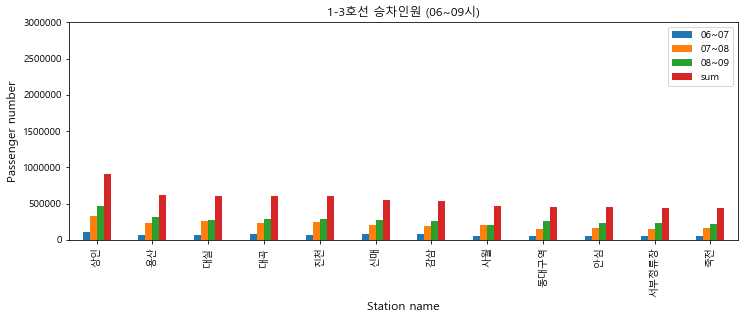

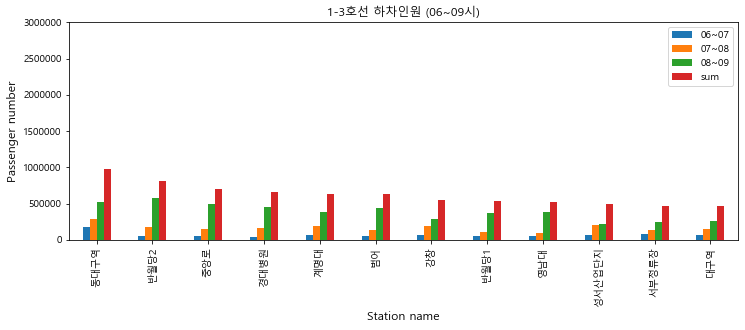

In [10]:
# top 12 station by passenger number during early morning time. 

up_total_아침_head = up_total_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = up_total_아침_head.plot(kind='bar', title='1-3호선 승차인원 (06~09시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)         
ax.set_ylabel('Passenger number', fontsize=12)    
ax.set_ylim(0, 3000000)

down_total_아침_head = down_total_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = down_total_아침_head.plot(kind='bar', title='1-3호선 하차인원 (06~09시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)         
ax.set_ylabel('Passenger number', fontsize=12)  
ax.set_ylim(0, 3000000)


(0, 3000000)

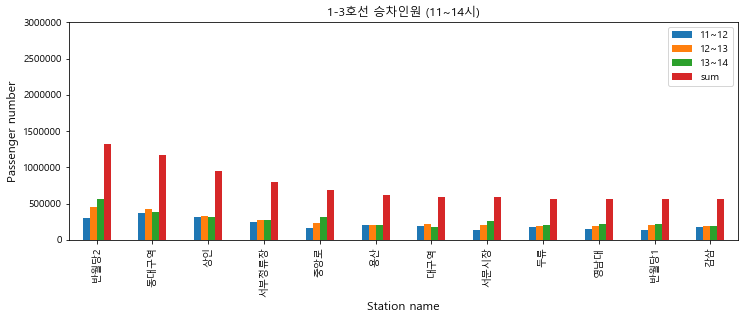

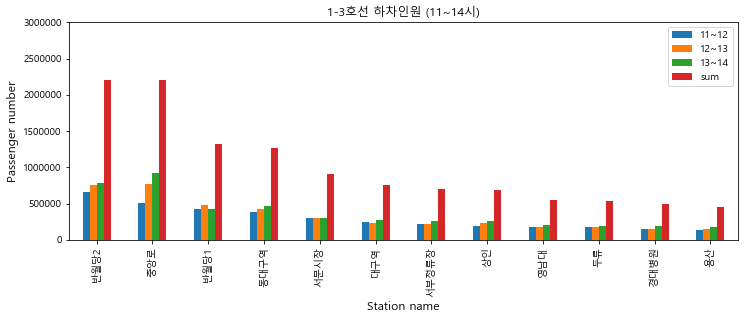

In [11]:
# lunch time 

up_total_점심_head = up_total_점심.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = up_total_점심_head.plot(kind='bar', title='1-3호선 승차인원 (11~14시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('Passenger number', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


down_total_점심_head = down_total_점심.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = down_total_점심_head.plot(kind='bar', title='1-3호선 하차인원 (11~14시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('Passenger number', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


아침보단 점심 시간대에 이용객수가 전반적으로 증가함, 특히 승차 인원보다 하차 인원 수가 훨씬 많음.  


(0, 3000000)

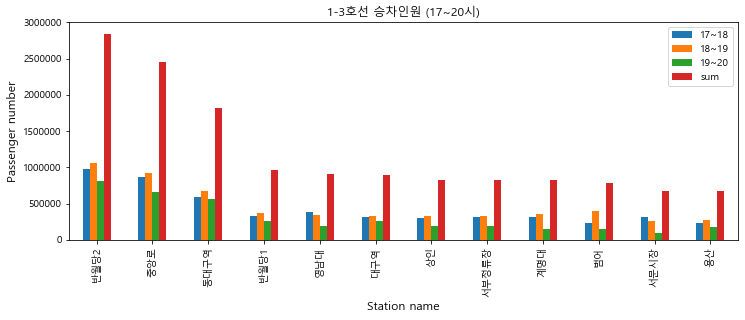

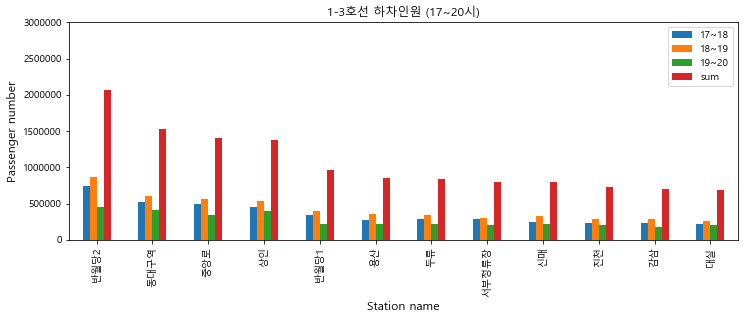

In [12]:
# evening time 

up_total_저녁_head = up_total_저녁.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = up_total_저녁_head.plot(kind='bar', title='1-3호선 승차인원 (17~20시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('Passenger number', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


down_total_저녁_head = down_total_저녁.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = down_total_저녁_head.plot(kind='bar', title='1-3호선 하차인원 (17~20시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('Passenger number', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


(0, 3000000)

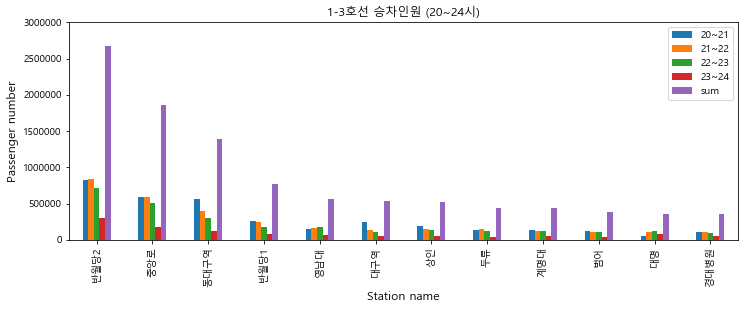

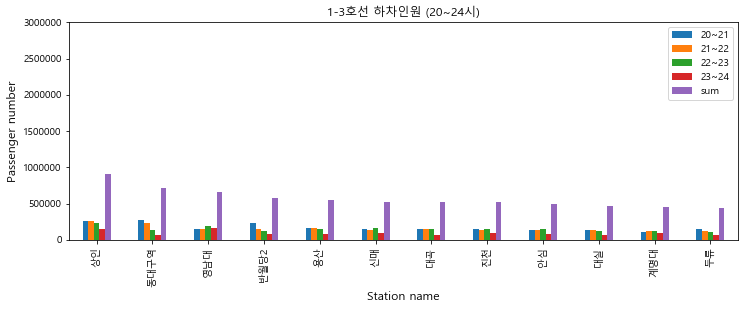

In [13]:
# night time 

up_total_밤_head = up_total_밤.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = up_total_밤_head.plot(kind='bar', title='1-3호선 승차인원 (20~24시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('Passenger number', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


down_total_밤_head = down_total_밤.sort_values(by = ['sum'],  axis=0, ascending=False).head(12)

ax = down_total_밤_head.plot(kind='bar', title='1-3호선 하차인원 (20~24시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('Passenger number', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


저녁 및 밤 시간대 *승차인원수*가 하루 중 가장 큰 값을 이루고 있음. 퇴근 및 하교, 모임 후 귀가인원으로 유추됨. 

특히, 주요 환승역이자 상권이 큰 반월당(2호선,1호선 환승), 중앙로(1호선), 동대구역(1호선)이 가장 큰 값을 보임. 
또한, 영남대(2호선), 상인(1호선), 두류(2호선), 계명대(2호선), 범어(2호선)도 많은 승차 인원을 확보하고 있음.   

* 맵으로 만들 것. 

### 호선별 분석을 위한 데이터 프레임 
data frame of each subway line

In [14]:

#1호선 이름 추출
subway_one_name = subway[:64][subway['승하'] == '승차']
subway_one_name = subway_one_name['역명']
# print(subway_one_name.count())
#2호선 이름 추출
subway_two_name = subway[64:122][subway['승하'] == '승차']
subway_two_name = subway_two_name['역명']
# print(subway_two_name.count())
#3호선 이름 추출
subway_thr_name = subway[122:182][subway['승하'] == '승차']
subway_thr_name = subway_thr_name['역명']
#1호선
subway_one = subway[subway['역명'].isin(subway_one_name)]
up_one = subway_one[subway_one['승하'] == '승차']
up_one = up_one.groupby(['역명']).sum()
down_one = subway_one[subway_one['승하'] == '하차']
down_one = down_one.groupby(['역명']).sum()
#2호선
subway_two = subway[subway['역명'].isin(subway_two_name)]
up_two = subway_two[subway_two['승하'] == '승차']
up_two = up_two.groupby(['역명']).sum()
down_two = subway_two[subway_two['승하'] == '하차']
down_two = down_two.groupby(['역명']).sum()
# #3호선
subway_thr = subway[subway['역명'].isin(subway_thr_name)]
up_thr = subway_thr[subway_thr['승하'] == '승차']
up_thr = up_thr.groupby(['역명']).sum()
down_thr = subway_thr[subway_thr['승하'] == '하차']
down_thr = down_thr.groupby(['역명']).sum()


### 1호선 시간대별 데이터프레임 만들기
1st line grouping by time 

In [15]:
#승차_1호선_시간대별
up_one_아침 = up_one.loc[:,["06~07","07~08","08~09"]]
up_one_오전 = up_one.loc[:,["09~10","10~11"]]

up_one_점심 = up_one.loc[:,["11~12","12~13","13~14"]]
up_one_오후 = up_one.loc[:,["14~15","15~16","16~17"]]
up_one_저녁 = up_one.loc[:,["17~18","18~19","19~20"]]
up_one_밤 =  up_one.loc[:,["20~21","21~22","22~23","23~24"]]
#하차_1호선_시간대별
down_one_아침 = down_one.loc[:,["06~07","07~08","08~09"]]
down_one_오전 = down_one.loc[:,["09~10","10~11"]]
down_one_점심 = down_one.loc[:,["11~12","12~13","13~14"]]
down_one_오후 = down_one.loc[:,["14~15","15~16","16~17"]]
down_one_저녁 = down_one.loc[:,["17~18","18~19","19~20"]]
down_one_밤 =  down_one.loc[:,["20~21","21~22","22~23","23~24"]]

In [16]:
#시간대별 이용객 합계 열 추가
#아침시간: 06~09시
#오전 시간:09시~11시
#점심 시간: 11시~14시
#오후시간: 14시~17시
#저녁시간: 17~20시
#밤시간:20~24시 
up_one_아침['sum'] = up_one_아침.apply(lambda row: (row['06~07'] + row['07~08'] + row['08~09']),axis=1) 
down_one_아침['sum'] = down_one_아침.apply(lambda row: (row['06~07'] + row['07~08'] + row['08~09']),axis=1) 
up_one_오전['sum'] = up_one_오전.apply(lambda row: (row['09~10'] + row['10~11']) ,axis=1)
down_one_오전['sum'] = down_one_오전.apply(lambda row: (row['09~10'] + row['10~11']),axis=1)
up_one_점심['sum'] = up_one_점심.apply(lambda row: (row['11~12'] + row['12~13'] + row['13~14']),axis=1)
up_one_오후['sum'] = up_one_오후.apply(lambda row: (row['14~15'] + row['15~16'] + row['16~17']),axis=1)
up_one_저녁['sum'] = up_one_저녁.apply(lambda row: (row['17~18'] + row['18~19'] + row['19~20']),axis=1)
up_one_밤['sum'] =  up_one_밤.apply(lambda row: (row['20~21'] + row['21~22'] + row['22~23']+row["23~24"]),axis=1)
down_one_점심['sum'] = down_one_점심.apply(lambda row: (row['11~12'] + row['12~13'] + row['13~14']),axis=1)
down_one_오후['sum'] = down_one_오후.apply(lambda row: (row['14~15'] + row['15~16'] + row['16~17']),axis=1)
down_one_저녁['sum'] = down_one_저녁.apply(lambda row: (row['17~18'] + row['18~19'] + row['19~20']),axis=1)
down_one_밤['sum'] =  down_one_밤.apply(lambda row: (row['20~21'] + row['21~22'] + row['22~23']+row["23~24"]),axis=1)

In [17]:
# up_one_출근.head(3)
down_one_밤.head(3)

,20~21,21~22,22~23,23~24,sum
역명,,,,,
각산,85756,86117,76863,53059,301795
교대,66368,57864,55166,42162,221560
대곡,150250,147631,152940,71365,522186


### 1호선 시간대별 이용객 분석 
chart of 1st line by time 

(0, 3000000)

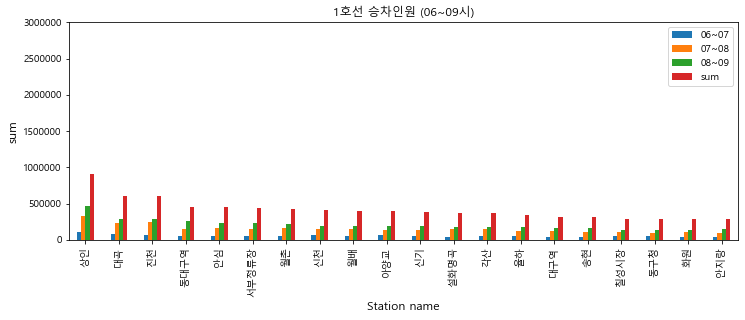

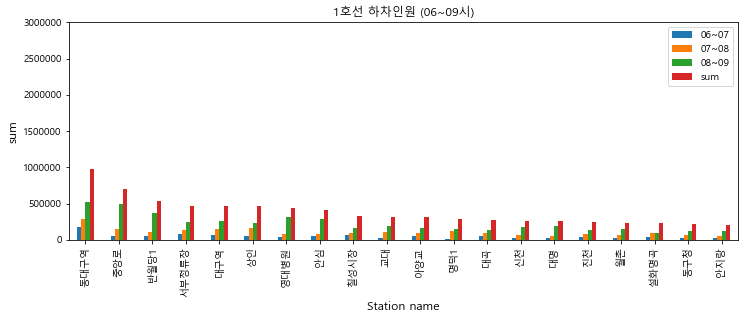

In [18]:

up_one_아침_head = up_one_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_one_아침_head.plot(kind='bar', title='1호선 승차인원 (06~09시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


down_one_아침_head = down_one_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = down_one_아침_head.plot(kind='bar', title='1호선 하차인원 (06~09시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


+ 출근시간 승차 지역: 주거지역일 확률이 높음.
+ 출근시간 하차 지역: (특이역- 기차역/환승역/고속버스정류장 등 제외)이 많이 포함되어있고, 버스 환승을 위해 내리는 역이 포함되어있을 수 있기에, 최종 도착지를 알기는 어려움.  

추가로 데이터 확인을 한다면, 주소지별 거주인원 정보를 확인해볼 수 있음.

### 1호선- 오전 


(0, 3000000)

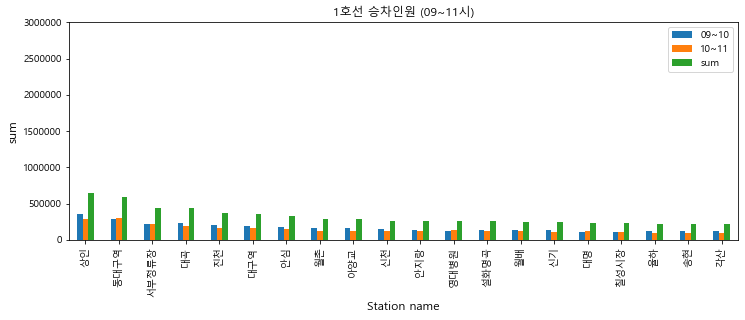

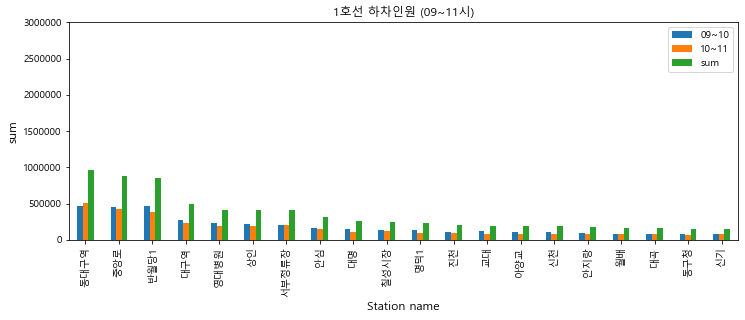

In [19]:
up_one_오전_head = up_one_오전.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_one_오전_head.plot(kind='bar', title='1호선 승차인원 (09~11시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


down_one_오전_head = down_one_오전.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = down_one_오전_head.plot(kind='bar', title='1호선 하차인원 (09~11시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


### 동대구역의 승하차 인원이 높은 이유를 몇가지 가능성을 유추해보면, 
* 버스로 환승
* 동대구 고속버스터미널 이용객 (대구 도착, 대구 출발)
* 동대구역 기차 이용객 (대구 도착, 대구 출발)
* 이외 동대구역 부근 시설 이용 

### 승하차 인원이 높은 이유 유추 
+ 주변에 고속버스터미널/기차역 있는가
+ 상권이 발달한 곳인가 
+ 버스 및 기타 다른 교통으로 환승하는 곳인가

확인 가능한 관련 데이터가 있는 경우 확인.

###  1호선/점심

(0, 3000000)

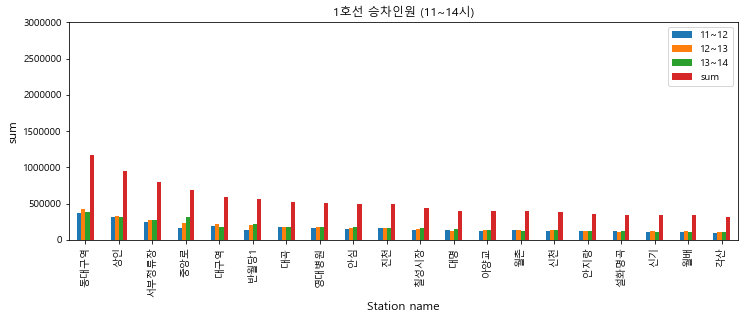

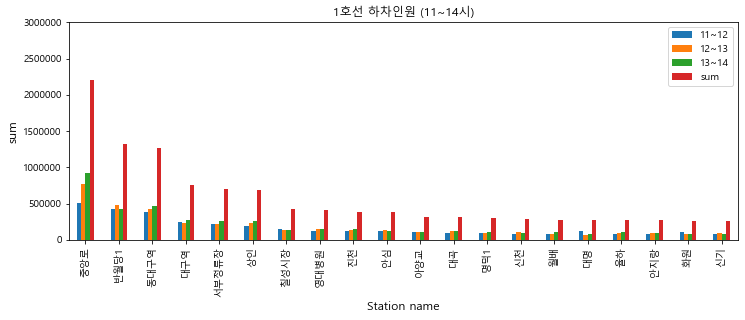

In [20]:
up_one_점심_head = up_one_점심.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_one_점심_head.plot(kind='bar', title='1호선 승차인원 (11~14시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)

down_one_점심_head = down_one_점심.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = down_one_점심_head.plot(kind='bar', title='1호선 하차인원 (11~14시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


### 1호선/오후

(0, 3000000)

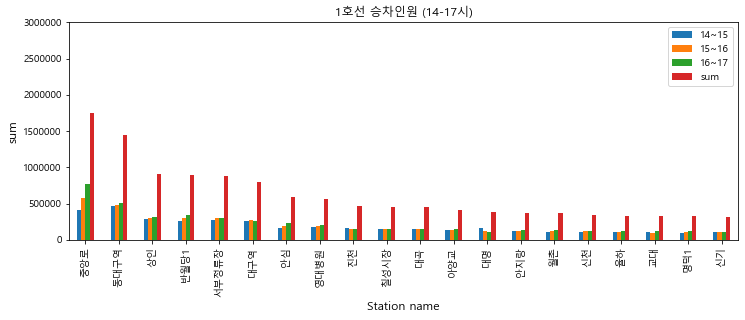

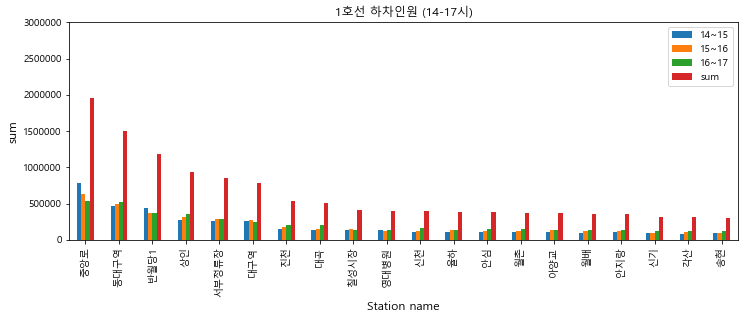

In [21]:
up_one_오후_head = up_one_오후.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_one_오후_head.plot(kind='bar', title='1호선 승차인원 (14-17시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


down_one_오후_head = down_one_오후.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = down_one_오후_head.plot(kind='bar', title='1호선 하차인원 (14-17시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


### 1호선/저녁

(0, 3000000)

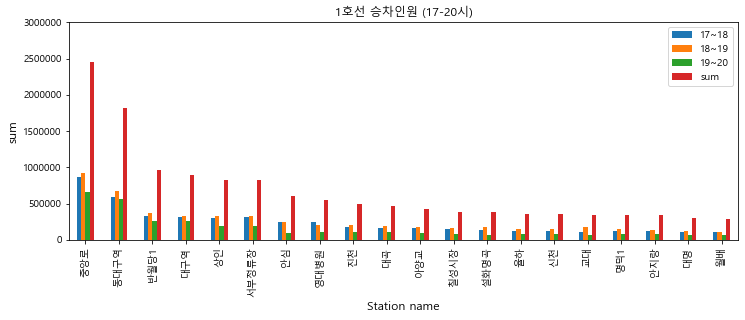

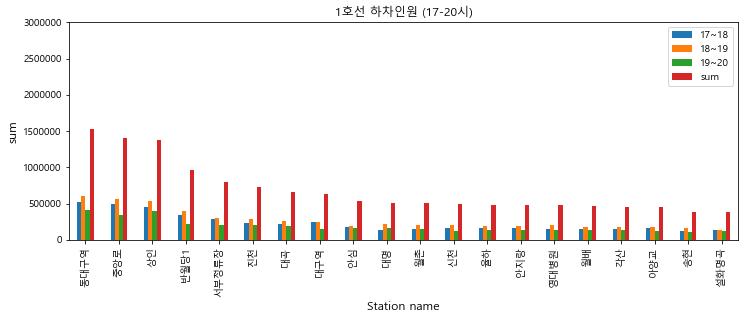

In [22]:
up_one_저녁_head = up_one_저녁.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_one_저녁_head.plot(kind='bar', title='1호선 승차인원 (17-20시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


down_one_저녁_head = down_one_저녁.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = down_one_저녁_head.plot(kind='bar', title='1호선 하차인원 (17-20시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


### 시간의 특성 (17~20시)
+ 퇴근 - 주변 직장 갯수와 비교 가능 
+ 하교 - 주변 학교 갯수와 비교 가능  
+ 저녁시간대 모임
+ 환승/시외버스 및 기차이용/ 기타 이유로 이용 

#### 추가비교자료 아이디어: 승하차 인원 높은 지하철역 부근의 백화점 매출액을 비교할 수 있는가? 
- 동대구역 신세계 백화점
- 중앙로역 롯데백화점
- 반월당역 동아백화점 
- 반월당역 현대백화점 

순위가 일치하는가?

### 1호선/밤

(0, 3000000)

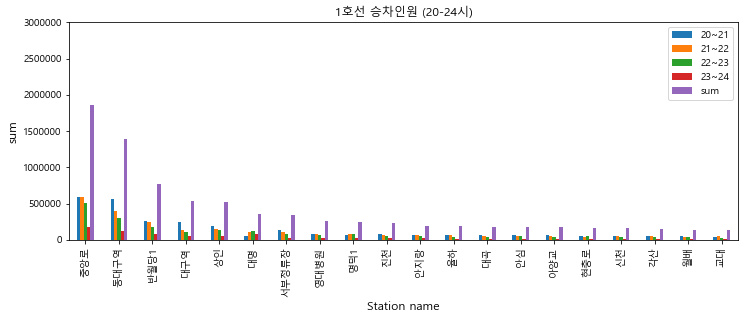

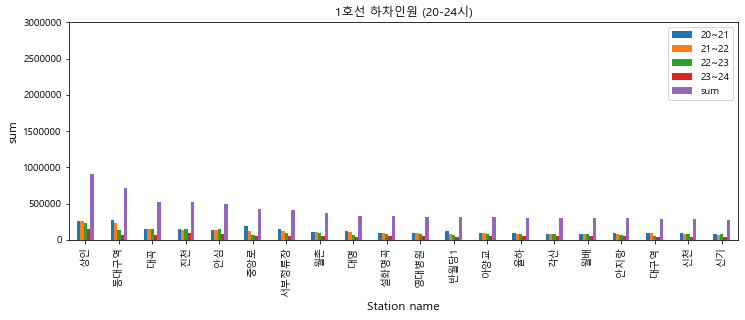

In [23]:
up_one_밤_head = up_one_밤.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_one_밤_head.plot(kind='bar', title='1호선 승차인원 (20-24시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


down_one_밤_head = down_one_밤.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = down_one_밤_head.plot(kind='bar', title='1호선 하차인원 (20-24시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


#### 23-24시에 승차 이용객 유추  

+ 승차 역에서 귀가 전까지 머무름
(핫플지수에 산입가능)
+ 버스-지하철 환승객

#### 23-24시 하차 이용객 유추 
+ 하차역에 거주자 (거주지 지수 산입가능)
+ 하차역에서 지하철-버스환승x(버스는 거의 환승 불가능)

거주자로 유추되는 지역은 실제 거주 인원 데이터와 함께 부동산 가격 비교 및 시내접근하는 소요 교통시간을 비교하면 관련도가 높을 것으로 보임. 

## 2호선
line num 2

In [24]:
#승차_2호선_시간대별
up_two_아침 = up_two.loc[:,["06~07","07~08","08~09"]]
up_two_오전 = up_two.loc[:,["09~10","10~11"]]

up_two_점심 = up_two.loc[:,["11~12","12~13","13~14"]]
up_two_오후 = up_two.loc[:,["14~15","15~16","16~17"]]
up_two_저녁 = up_two.loc[:,["17~18","18~19","19~20"]]
up_two_밤 =  up_two.loc[:,["20~21","21~22","22~23","23~24"]]
#하차_2호선_시간대별
down_two_아침 = down_two.loc[:,["06~07","07~08","08~09"]]
down_two_오전 = down_two.loc[:,["09~10","10~11"]]

down_two_점심 = down_two.loc[:,["11~12","12~13","13~14"]]

down_two_오후 = down_two.loc[:,["14~15","15~16","16~17"]]
down_two_저녁 = down_two.loc[:,["17~18","18~19","19~20"]]
down_two_밤 =  down_two.loc[:,["20~21","21~22","22~23","23~24"]]

In [25]:
#시간대별 이용객 합계 열 추가
#아침시간: 06~09시
#오전 시간:09시~11시
#점심 시간: 11시~14시
#오후시간: 14시~17시
#저녁시간: 17~20시
#밤시간:20~24시
up_two_아침['sum'] = up_two_아침.apply(lambda row: (row['06~07'] + row['07~08'] + row['08~09']),axis=1) 
down_two_아침['sum'] = down_two_아침.apply(lambda row: (row['06~07'] + row['07~08'] + row['08~09']),axis=1) 
up_two_오전['sum'] = up_two_오전.apply(lambda row: (row['09~10'] + row['10~11']) ,axis=1)
down_two_오전['sum'] = down_two_오전.apply(lambda row: (row['09~10'] + row['10~11']),axis=1)
up_two_점심['sum'] = up_two_점심.apply(lambda row: (row['11~12'] + row['12~13'] + row['13~14']),axis=1)
up_two_오후['sum'] = up_two_오후.apply(lambda row: (row['14~15'] + row['15~16'] + row['16~17']),axis=1)
up_two_저녁['sum'] = up_two_저녁.apply(lambda row: (row['17~18'] + row['18~19'] + row['19~20']),axis=1)
up_two_밤['sum'] =  up_two_밤.apply(lambda row: (row['20~21'] + row['21~22'] + row['22~23']+row["23~24"]),axis=1)
down_two_점심['sum'] = down_two_점심.apply(lambda row: (row['11~12'] + row['12~13'] + row['13~14']),axis=1)
down_two_오후['sum'] = down_two_오후.apply(lambda row: (row['14~15'] + row['15~16'] + row['16~17']),axis=1)
down_two_저녁['sum'] = down_two_저녁.apply(lambda row: (row['17~18'] + row['18~19'] + row['19~20']),axis=1)
down_two_밤['sum'] =  down_two_밤.apply(lambda row: (row['20~21'] + row['21~22'] + row['22~23']+row["23~24"]),axis=1)

(0, 3000000)

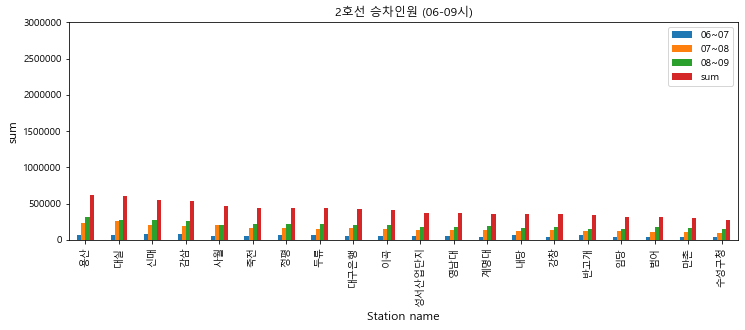

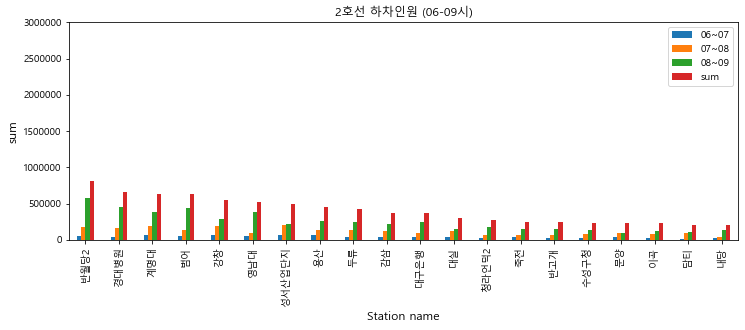

In [26]:
up_two_아침_head = up_two_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_two_아침_head.plot(kind='bar', title='2호선 승차인원 (06-09시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)

down_two_아침_head = down_two_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)
ax = down_two_아침_head.plot(kind='bar', title='2호선 하차인원 (06-09시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


(0, 3000000)

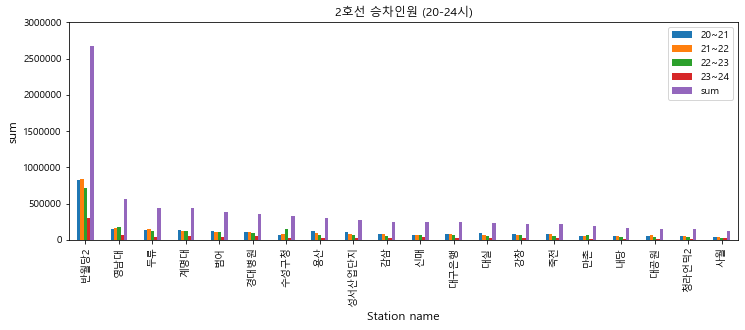

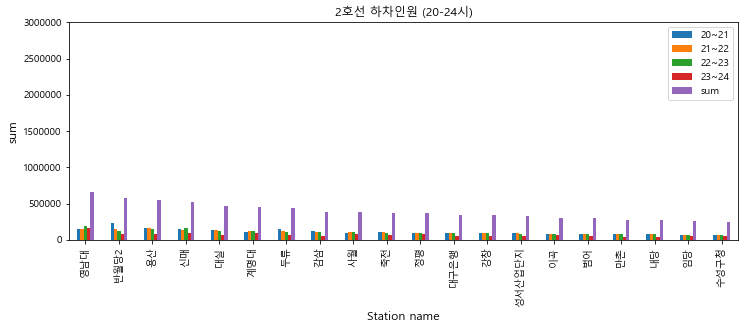

In [27]:
up_two_밤_head = up_two_밤.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_two_밤_head.plot(kind='bar', title='2호선 승차인원 (20-24시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)

down_two_밤_head = down_two_밤.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)
ax = down_two_밤_head.plot(kind='bar', title='2호선 하차인원 (20-24시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


#### 1호선 반월당역과 2호선 반월당역의 비교
하차하는 지하철역이 1호선에 있는지 2호선에 있는지의 차이일 수 있음. 
또한, 마지막 타임의 승차인원의 합과 하차인원의 합이 거의 같을 것.

## 3호선

- 수정할사항: 역간 비교는 이용객수의 차이가 많이 나지 않으므로 , 시간대별 전체 이용객수를 비교하는 그래프를 그리는 것이 나을듯. 

In [28]:
#승차_3호선_시간대별
up_thr_아침 = up_thr.loc[:,["06~07","07~08","08~09"]]
up_thr_오전 = up_thr.loc[:,["09~10","10~11"]]
up_thr_점심 = up_thr.loc[:,["11~12","12~13","13~14"]]
up_thr_오후 = up_thr.loc[:,["14~15","15~16","16~17"]]
up_thr_저녁 = up_thr.loc[:,["17~18","18~19","19~20"]]
up_thr_밤 =  up_thr.loc[:,["20~21","21~22","22~23","23~24"]]
#하차_3호선_시간대별
down_thr_아침 = down_thr.loc[:,["06~07","07~08","08~09"]]
down_thr_오전 = down_thr.loc[:,["09~10","10~11"]]
down_thr_점심 = down_thr.loc[:,["11~12","12~13","13~14"]]
down_thr_오후 = down_thr.loc[:,["14~15","15~16","16~17"]]
down_thr_저녁 = down_thr.loc[:,["17~18","18~19","19~20"]]
down_thr_밤 =  down_thr.loc[:,["20~21","21~22","22~23","23~24"]]

In [29]:
#시간대별 이용객 합계 열 추가
#아침시간: 06~09시
#오전 시간:09시~11시
#점심 시간: 11시~14시
#오후시간: 14시~17시
#저녁시간: 17~20시
#밤시간:20~24시
up_thr_아침['sum'] = up_thr_아침.apply(lambda row: (row['06~07'] + row['07~08'] + row['08~09']),axis=1) 
down_thr_아침['sum'] = down_thr_아침.apply(lambda row: (row['06~07'] + row['07~08'] + row['08~09']),axis=1) 
up_thr_오전['sum'] = up_thr_오전.apply(lambda row: (row['09~10'] + row['10~11']) ,axis=1)
down_thr_오전['sum'] = down_thr_오전.apply(lambda row: (row['09~10'] + row['10~11']),axis=1)
up_thr_점심['sum'] = up_thr_점심.apply(lambda row: (row['11~12'] + row['12~13'] + row['13~14']),axis=1)
up_thr_오후['sum'] = up_thr_오후.apply(lambda row: (row['14~15'] + row['15~16'] + row['16~17']),axis=1)
up_thr_저녁['sum'] = up_thr_저녁.apply(lambda row: (row['17~18'] + row['18~19'] + row['19~20']),axis=1)
up_thr_밤['sum'] =  up_thr_밤.apply(lambda row: (row['20~21'] + row['21~22'] + row['22~23']+row["23~24"]),axis=1)
down_thr_점심['sum'] = down_thr_점심.apply(lambda row: (row['11~12'] + row['12~13'] + row['13~14']),axis=1)
down_thr_오후['sum'] = down_thr_오후.apply(lambda row: (row['14~15'] + row['15~16'] + row['16~17']),axis=1)
down_thr_저녁['sum'] = down_thr_저녁.apply(lambda row: (row['17~18'] + row['18~19'] + row['19~20']),axis=1)
down_thr_밤['sum'] =  down_thr_밤.apply(lambda row: (row['20~21'] + row['21~22'] + row['22~23']+row["23~24"]),axis=1)

(0, 3000000)

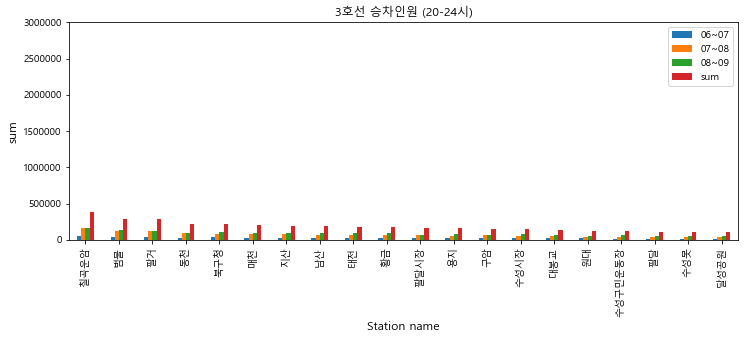

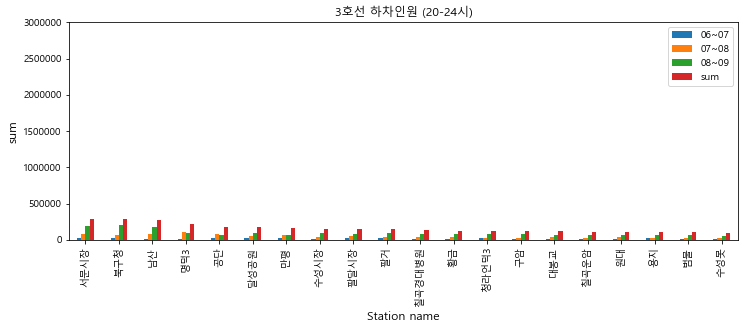

In [30]:
up_thr_아침_head = up_thr_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)

ax = up_thr_아침_head.plot(kind='bar', title='3호선 승차인원 (20-24시)',  legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)

down_thr_아침_head = down_thr_아침.sort_values(by = ['sum'],  axis=0, ascending=False).head(20)
ax = down_thr_아침_head.plot(kind='bar', title='3호선 하차인원 (20-24시)',legend=True,figsize=(12, 4))
ax.set_xlabel('Station name', fontsize=12)          # x축 정보 표시
ax.set_ylabel('sum', fontsize=12)     # y축 정보 표시
ax.set_ylim(0, 3000000)


### 주말 하루종일 가장 이용이 많은 역, 주말 하루종일 가장 이용이 많은 시간 (전체 대비 퍼센트 함께 표시)

In [31]:
from datetime import date
import numpy as np 

In [32]:
subway = pd.read_csv("subway.csv", encoding="CP949")

subway_total = subway
subway_total

,월,일,역번호,역명,승하,05~06,06~07,07~08,08~09,09~10,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,일계
0,1,1,1150,설화명곡,승차,48,59,65,99,139,...,228,204,202,150,95,62,53,30,4,2545
1,1,1,1150,설화명곡,하차,2,102,62,68,72,...,152,178,202,208,217,168,169,140,87,2377
2,1,1,1160,화원,승차,22,51,56,96,144,...,227,189,168,135,75,65,33,33,8,2430
3,1,1,1160,화원,하차,1,64,36,46,82,...,218,199,211,202,166,111,134,143,109,2522
4,1,1,1170,대곡,승차,35,78,94,192,245,...,289,281,259,242,157,126,118,71,21,3855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66425,12,31,3390,지산,하차,3,25,43,160,68,...,172,196,222,282,135,106,111,87,111,2393
66426,12,31,3400,범물,승차,43,87,316,389,284,...,324,321,319,290,192,172,147,128,73,4712
66427,12,31,3400,범물,하차,3,30,56,220,223,...,375,381,455,427,300,189,167,141,177,4439
66428,12,31,3410,용지,승차,24,51,133,224,186,...,192,151,192,160,97,48,53,42,18,2524


In [33]:
def printDayOfTheWeek (year, month, day):
    day = date(year, month, day).weekday()
    if day in (4,5,6):
        return '금토일'
    else:
        return '월화수목'


In [34]:
week=[]
weekbase = subway_total
myYear = 2019
for i in range(weekbase.shape[0]):
    myMonth, myDay = weekbase.iloc[i]['월'], weekbase.iloc[i]['일']
    tmp = printDayOfTheWeek(myYear, myMonth, myDay)
    week.append(printDayOfTheWeek(myYear, myMonth, myDay))
weekbase['요일구분']=week

In [35]:
ends = weekbase[weekbase['요일구분']=='금토일']
days = weekbase[weekbase['요일구분']=='월화수목']

In [36]:
ends

,월,일,역번호,역명,승하,05~06,06~07,07~08,08~09,09~10,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,일계,요일구분
546,1,4,1150,설화명곡,승차,39,86,311,540,409,...,316,391,652,199,146,109,64,14,5268,금토일
547,1,4,1150,설화명곡,하차,0,115,241,277,202,...,263,360,339,321,223,226,292,184,4364,금토일
548,1,4,1160,화원,승차,40,98,271,377,326,...,272,290,371,172,178,66,71,22,4452,금토일
549,1,4,1160,화원,하차,2,67,157,303,189,...,298,351,370,280,196,208,211,147,4174,금토일
550,1,4,1170,대곡,승차,65,188,539,910,680,...,420,528,700,394,230,166,141,57,7950,금토일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66061,12,29,3390,지산,하차,1,22,12,51,38,...,134,173,125,99,65,83,62,67,1469,금토일
66062,12,29,3400,범물,승차,31,53,60,101,211,...,238,234,162,94,79,72,53,27,2754,금토일
66063,12,29,3400,범물,하차,5,23,38,36,110,...,308,257,219,152,149,148,116,89,2642,금토일
66064,12,29,3410,용지,승차,22,37,36,88,134,...,152,131,72,60,22,19,25,5,1800,금토일


In [37]:
# 승하차 합 

total_days= days.groupby(['역명']).mean()

total_ends = ends.groupby(['역명']).mean()
# total = subway_total[subway_total['승하'] == '하차']
# down_total = down_total.groupby(['역명']).sum()

In [38]:
total_days

,월,일,역번호,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,일계
역명,,,,,,,,,,,,,,,,,,,,,
각산,6.511962,15.770335,1450.0,28.447368,113.885167,338.380383,439.662679,299.717703,214.992823,227.409091,...,287.543062,306.339713,360.643541,455.131579,293.502392,187.825359,189.830144,171.842105,91.148325,4765.105263
감삼,6.511962,15.770335,2250.0,67.188995,178.232057,525.815789,808.222488,534.545455,402.165072,402.468900,...,511.112440,620.703349,666.595694,820.200957,420.811005,291.478469,261.801435,224.337321,109.433014,8242.078947
강창,6.511962,15.770335,2190.0,22.322967,169.126794,581.569378,823.428230,442.023923,427.657895,373.059809,...,434.114833,498.239234,701.040670,651.605263,343.631579,255.188995,232.349282,226.459330,104.136364,7449.421053
건들바위,6.511962,15.770335,3320.0,7.875598,24.095694,64.808612,142.232057,115.933014,83.174641,78.693780,...,92.940191,97.287081,108.361244,141.657895,69.961722,51.229665,38.421053,29.500000,16.633971,1441.813397
경대병원,6.511962,15.770335,2310.0,29.811005,118.751196,408.933014,992.397129,592.882775,454.643541,437.940191,...,508.849282,502.937799,610.700957,799.990431,369.655502,257.593301,244.978469,206.736842,114.904306,7980.055024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
학정,6.511962,15.770335,3130.0,3.631579,8.488038,37.021531,45.578947,23.346890,19.131579,18.399522,...,23.727273,29.724880,36.724880,34.509569,13.834928,8.000000,8.105263,8.622010,7.614833,394.401914
해안,6.511962,15.770335,1390.0,39.296651,84.208134,182.870813,298.600478,193.729665,163.031100,153.514354,...,185.799043,217.354067,223.301435,274.777512,155.002392,108.700957,92.717703,92.447368,45.650718,3050.887560
현충로,6.511962,15.770335,1260.0,34.019139,100.889952,210.521531,401.095694,316.090909,221.232057,217.562201,...,273.846890,324.839713,325.956938,410.279904,234.191388,179.866029,172.102871,157.433014,72.327751,4448.191388


In [39]:
total_days = total_days.loc[:,["06~07","07~08","08~09","09~10","10~11","11~12","12~13","13~14","14~15","15~16","16~17","17~18","18~19","19~20","20~21","21~22","22~23","23~24"]]
total_days
total_ends = total_ends.loc[:,["06~07","07~08","08~09","09~10","10~11","11~12","12~13","13~14","14~15","15~16","16~17","17~18","18~19","19~20","20~21","21~22","22~23","23~24"]]


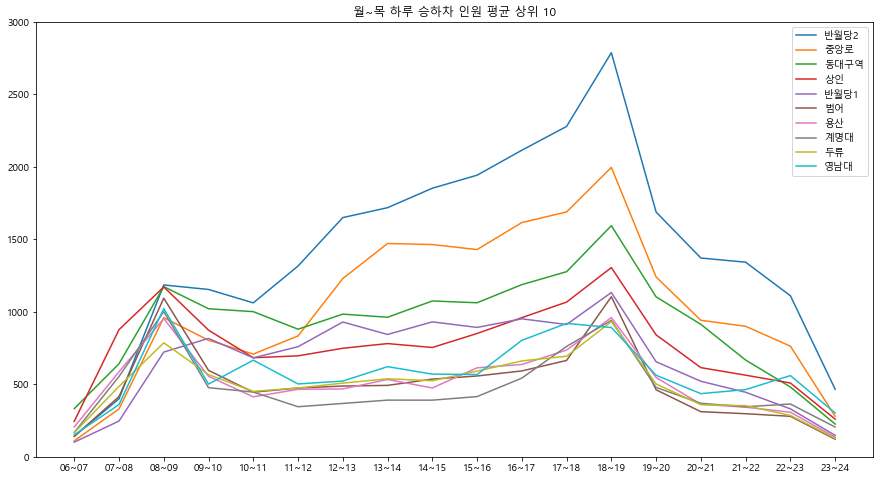

In [40]:


total_days



total_days_head= total_days.sort_values(by = ['18~19'],  axis=0, ascending=False).head(10)

plt.figure(figsize=(15, 8))
for i in range(total_days_head.shape[0]):
    plt.plot(total_days_head.iloc[i], label=total_days_head.iloc[i].name)
plt.title("월~목 하루 승하차 인원 평균 상위 10")
plt.ylim(0,3000)
plt.legend()
plt.show()

* 출근 및 등교 시간대인 7시~9시에 이용객 수가 집중되는 형태를 보임. 
* 오전 및 오후 시간 (9시 이후부터 6시까지) 이용객 수가 증가하는 양상을 보이고, 특히 11시-12시를 기점으로 큰폭으로 증가함. 18시-19시에 퇴근 및 하교, 귀가 인원이 집중되어 대부분의 역에 대해 하루 중 가장 높은 이용객수를 기록하는 것을 확인할 수 있음. 


* 전체 이용객 수의 순위와 원인 유추

    * 1:  반월당2: 주요 환승역, 버스 정류장과 연결, 동성로 상권
    * 2: 중앙로: 버스 정류장과 연결, 상권 발달 
    * 3: 동대구역: 기차역, 시외 버스 터미널, 버스 정류장과 연결, 신세계 백화점 
    * 4: 상인: 주요 거주지, 상권 발달 
    * 5: 반월당1: 주요 환승역, 버스 정류장과 연결, 상권 발달 
    * 6: 범어: 학원 집중지, 주요 거주지, 버스 정류장과 연결


* 반월당 1,2호선은 주요 환승역이며 동성로 상권이 형성되어 있어 유동인구가 높음. 동대구역은 기차역과 버스터미널이 있고 신세계 백화점이 있어서 유동인구가 높은 것으로 유추됨.   


* 반월당 2호선, 중앙로역, 반월당 1호선의 비교:
    반월당 2호선과 중앙로역의 위치는 동성로 상권과 더 가깝고 달구벌대로에 위치한 버스정류장 혹은 북구 방향으로 가는 버스 정류장과 가까움. 반월당 1호선역은 남구 방향으로 가는 버스 정류장과 가까움. 따라서, 반월당 2호선과 중앙로역의 승하차 인원은 동성로 상권 이용자, 달구벌대로 및 북구 뱡향 교통 이용자 등으로 구성되고, 반월당 1호선 승하차 인원은 남구 방향 교통 이용자 등으로 구성된다고 유추함. 


* 주말 이용객과 비교하여 눈에 띄는 점은, 범어역, 계명대역, 영남대역이 순위에 있다는 것으로, 범어역에 학교 및 학원, 직장이 많기 때문으로 유추됨. 또한 계명대와 영남대와 같이 대학교 이용인원이 평일에 집중되기 때문으로 유추됨. 

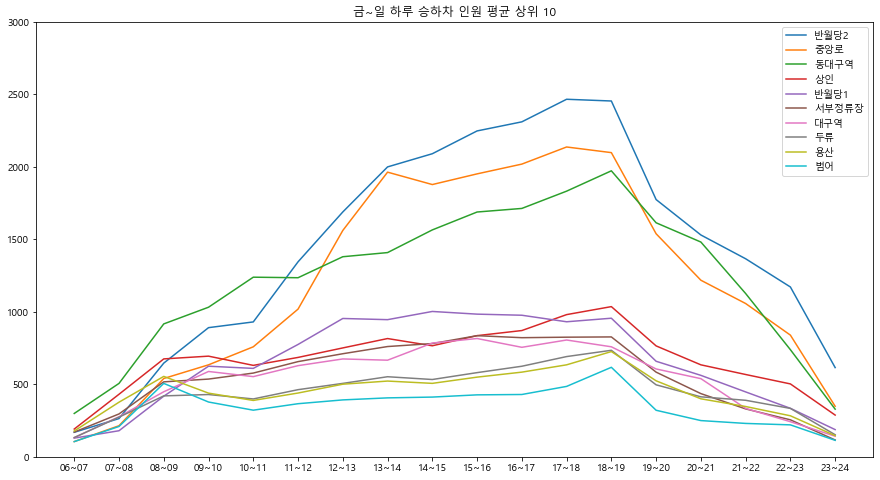

In [41]:
total_ends
total_ends_head= total_ends.sort_values(by = ['18~19'],  axis=0, ascending=False).head(10)

plt.figure(figsize=(15, 8))
for i in range(total_ends_head.shape[0]):
    plt.plot(total_ends_head.iloc[i], label=total_ends_head.iloc[i].name)
plt.legend()
plt.ylim(0,3000)
plt.title("금~일 하루 승하차 인원 평균 상위 10")
plt.show()


* 역별 비교
    * 평일과 비교하여 특이한 점은, 대구역과 서부정류장역이 상위 12개 역에 포함되었다는 것임. 이 역들은 기차역과 시외 버스터미널에 위치한 만큼 주말에 다른 지역으로 이동하는 인원이 주말에 많다는 것을 유추할 수 있다. 

* 시간대별 비교

    * 반월당1, 반월당2, 중앙로역은 이른 오전에 비해 11시 이후에 이용객수가 증가하는 것을 볼 수 있음. 그리고, 18시 이후로는 이용객수 감소를 보임. 평일과 비교하여 주말의 경우, 출근 및 등교 (7-9시)와 퇴근 및 하교 (18-19시) 시간대의 상승세가 완만한 것이 눈에 띔. 이 시간대의 이용객 수의 집중도가 평일에 비해 낮으며 오전과 오후의 시간대에 비교적 고루 분포되어 있음. 10시부터 19시까지 이용객 수가 가장 많고 이외의 시간대에는 감소세를 보임. 
    * 상인역, 두류역, 서부정류장역은 출근 및 등교 시간대인 8시~9시 쯤에 이용객 수가 높고, 오전시간에 눈에 띄는 증가는 없음. 점심시간인 12시와 2시까지 다소 증가하며 오후에 증가세를 보이다가 저녁시간 및 퇴근시간인 오후 6시-7시 사이에 하루 중 가장 큰 이용객 수를 보임. 이후에는 감소세를 보임. 출근 및 등교 혹은 퇴근 및 하교 시간에 맞춰 증가하는 양상으로 보아 거주지역이 밀집되어 있는 것으로 유추됨.  



In [42]:
# jason파일로 저장
# total_ends_head.to_json('total_ends_head.json',orient='table')
# total_days_head.to_json('total_days_head.json',orient='table')

### comparing each station's user number by month
comparing major stations on weekdays vs weekends

In [45]:
subway = pd.read_csv("subway.csv", encoding="cp949")
subway_up = subway[subway['승하']=='승차']
subway_upgroup = subway_up.groupby(['역명','월']).sum()


In [ ]:
# gaksan = subway_upgroup.loc[('각산',),:]
# ddaegu=subway_upgroup.loc[('동대구역',),:]
# seobu=subway_upgroup.loc[('서부정류장',),:]
# daegu=subway_upgroup.loc[('대구역',),:]
# banwol1 = subway_upgroup.loc[('반월당1',),:]
# banwol2 = subway_upgroup.loc[('반월당2',),:]

# gaksan=gaksan.drop(['일','역번호','일계'],axis=1)
# ddaegu=ddaegu.drop(['일','역번호','일계'],axis=1)
# banwol1 = banwol1.drop(['일','역번호','일계'],axis=1)
# banwol2 = banwol2.drop(['일','역번호','일계'],axis=1)
# seobu=seobu.drop(['일','역번호','일계'],axis=1)
# daegu=daegu.drop(['일','역번호','일계'],axis=1)


In [ ]:
# plt.figure(figsize=(15, 4))
# for i in range(len(ddaegu)):
#     plt.plot(ddaegu.iloc[i], label = ddaegu.index[i])
#     plt.legend(fontsize='x-large')
    
# plt.show()

In [46]:
subway_station = subway.groupby(['월','역명']).sum()
subway_station
mon_df = pd.DataFrame()

In [47]:
monnames = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
monnums = [1,2,3,4,5,6,7,8,9,10,11,12]
for e,n in enumerate(monnames,1):
    temp = subway_station.loc[(e,),:] 
    mon_df[n] = temp['일계']

In [48]:
mon_df

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
역명,,,,,,,,,,,,
각산,264317,231762,273842,272476,292274,266295,278355,260873,251714,283336,280636,288369
감삼,445567,383274,474228,481632,509371,454774,469013,438285,437764,479285,466271,473079
강창,221091,196281,324694,414003,490647,428330,408100,377538,436641,469609,468961,443388
건들바위,80289,70136,84257,84931,86803,79836,81187,75354,76449,86674,84772,85290
경대병원,434941,372080,458028,468177,473058,422866,441815,407758,408727,446783,447551,453883
...,...,...,...,...,...,...,...,...,...,...,...,...
학정,21520,18368,24443,23699,24928,22396,22181,19672,19730,22084,22280,23037
해안,174334,152856,186364,186198,197056,178493,176216,168434,169321,193171,190649,193495
현충로,239616,212461,261477,257568,269597,247248,255802,242643,237797,264157,261987,262329


In [49]:

# 라벨 : 역 12개 
# y축: 일계
# x축: 1월~12월
monthly = subway.groupby(['역명']).sum()[['일계']]
monthly.rename(columns = {'일계': '1월합'}, inplace = True)
jan = subway_station.loc[(1,),:] 


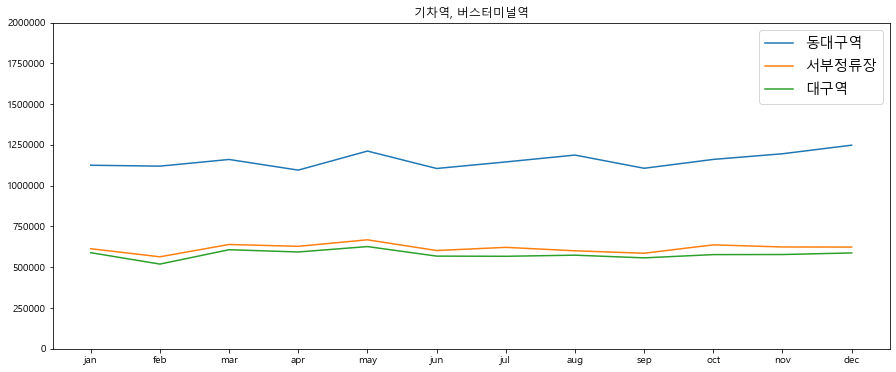

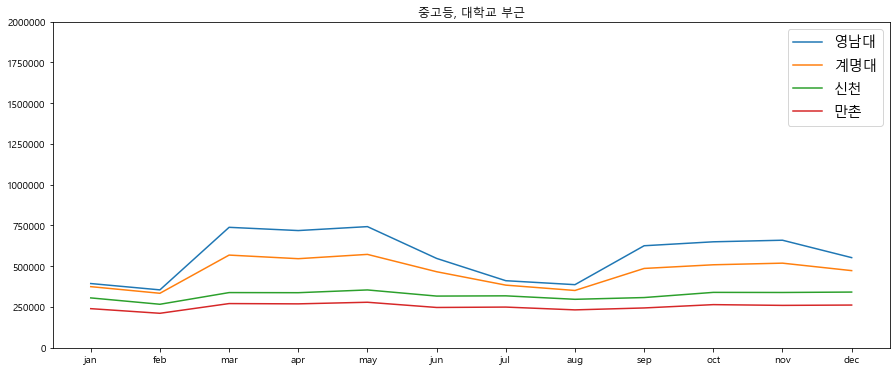

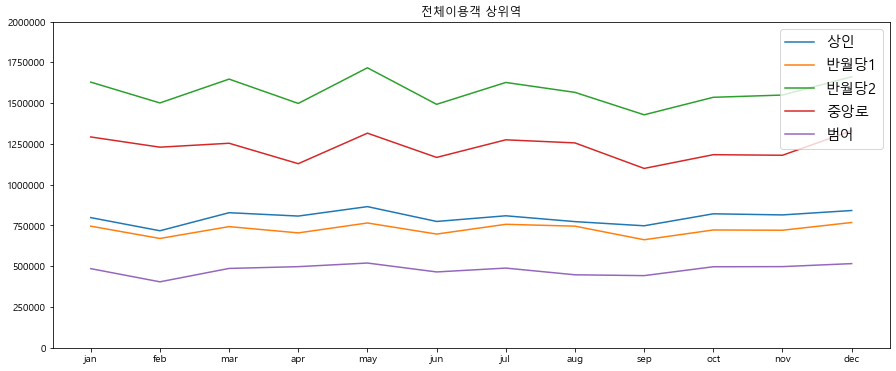

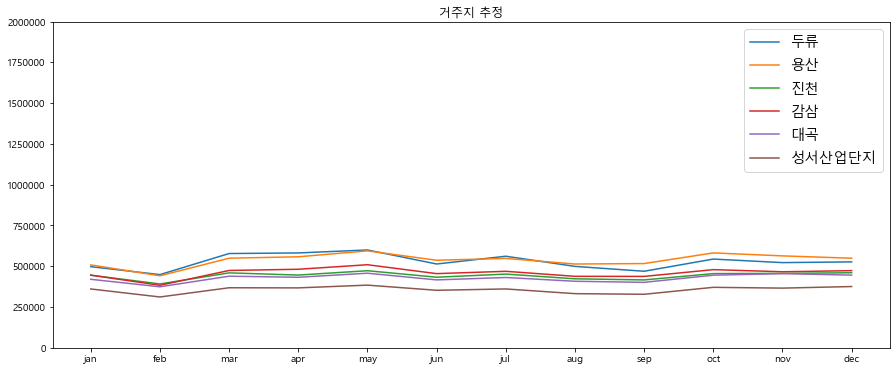

In [51]:
# 월별 

travel = ['동대구역','서부정류장','대구역']
school = ['영남대','계명대','신천','만촌']
gather = ['상인','반월당1','반월당2','중앙로','범어']
house = ['두류','용산','진천','감삼','대곡','성서산업단지']

plt.figure(figsize=(15, 6))
for n in travel:
    plt.plot(mon_df.loc[n,:], label = n)
    plt.legend(fontsize='x-large')
    plt.ylim(0,2000000)
plt.title("기차역, 버스터미널역")
plt.show()

plt.figure(figsize=(15, 6))
for n in school:
    plt.plot(mon_df.loc[n,:], label = n)
    plt.legend(fontsize='x-large')
    plt.ylim(0,2000000)
plt.title("중고등, 대학교 부근")

plt.show()

plt.figure(figsize=(15, 6))
for n in gather:
    plt.plot(mon_df.loc[n,:], label = n)
    plt.legend(fontsize='x-large')

    plt.ylim(0,2000000)
plt.title("전체이용객 상위역")
plt.show()


plt.figure(figsize=(15, 6))
for n in house:
    plt.plot(mon_df.loc[n,:], label = n)
    plt.legend(fontsize='x-large')

    plt.ylim(0,2000000)
plt.title("거주지 추정")
plt.show()

데이터 프레임: 승차, 하차 인원의 월별 합으로 구성. 

우선, 대구 1~3호선 지하철역 91개에 대해서, 세 가지로 그룹을 나누어 분석을 진행. 

* 1. "기차역, 버스터미널역" 
* 2. "중고등, 대학교 부근"
* 3. "전체이용객 상위역" 

결과 해석 

* "기차역, 버스터미널역" 
   : 동대구역은 기차 및 버스터미널을 이용하는 여행객뿐만 아니라 신세계 백화점 상권을 이용하는 사람과 버스정류장 등 환승 교통 이용객도 많은 것으로 유추됨. 특이한 점은 "전체이용객 상위역"에 나타나는 월별 이용객수 패턴과 유사한 패턴으로 이용객 증감 추세를 보임. 대구역과 서부정류장의 경우 1, 3, 5, 10월 이용객이 소폭 상승하는 형태를 보임. 
* "중고등, 대학교 부근" 
    * 2-3월, 8-9월에 눈에 띄는 상승세, 5월부터 8월까지 하락세, 11월에서 2월까지 하락세를 보임. 3월과 9월이 초,중,고,대학교의 학기시작, 12월-2월, 6월-8월이 방학기간임을 고려하여 학기 및 방학 기간과 일치하는 형태를 보임. 
* "전체이용객 상위역" 
    * 3월, 5월, 7월에 이용객이 전월대비 향상하는 형태, 7월부터 9월까지 하락세를 그리고 9월 이후로는 연말까지 이용객수 향상세를 보이다가 1월이 지나고 2월에 이용객이 감소함. 특별히 이용객 수가 감소하는 달의 감소원인을 유추하면 다음과 같음. 


    * 4월, 6월에 전월대비 이용객 감소: 1학기 중간고사, 기말고사
    * 9월 이용객 감소: 추석연휴로 해외여행 및 타지역으로 이동하는 인구가 많기 때문으로 유추됨.
    * 9월이후 연말에 향상세: 연말 모임때문으로 유추됨.  

In [52]:
# jason 파일로 저장
# mon_df.to_json('mon_df.json',orient='table')